In [90]:
!pip install dash

import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar arquivo sample.xlsx
file_path = 'sample.xlsx'
excel_data = pd.ExcelFile(file_path)
# Carregar todas as planilhas do arquivo
sheets = {sheet_name: excel_data.parse(sheet_name) for sheet_name in excel_data.sheet_names}
# Exibir as planilhas carregadas
sheets


{'Orders':       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
 0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
 1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
 2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
 3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
 4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
 ...      ...             ...        ...        ...             ...   
 9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
 9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
 9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
 9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
 9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   
 
      Customer ID     Customer Name    Segment        Country             City  \
 0       CG-12520       Claire Gute   Consumer  United

In [ ]:
orders_df = sheets['Orders']
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Inspecionar dados da planilha 'Returns'
returns_df = sheets['Returns']
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
# Inspecionar dados da planilha 'People'
people_df = sheets['People']
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [ ]:
# Unir os dados de Orders e Returns com base na coluna 'Order ID'
merged_df = pd.merge(orders_df, returns_df, on='Order ID', how='left')
filtered_df = merged_df[merged_df['Returned'] != 'Yes']

# Exibir as primeiras linhas do DataFrame filtrado
filtered_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN


In [ ]:
# Verificar algumas anomalias nos dados da planilha
# 1. Verificar valores nulos
null_values = filtered_df.isnull().sum()
null_values

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Returned         9194
dtype: int64

In [ ]:
# 2. Verificar valores duplicados
duplicate_rows = filtered_df[filtered_df.duplicated()]
duplicate_rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned


In [ ]:
# 3. Verificar inconsistências nas datas (Ship Date anterior ao Order Date)
date_anomalies = filtered_df[filtered_df['Ship Date'] < filtered_df['Order Date']]
date_anomalies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned





 '







---



```
ANALISE DE ANOMALIS DE VALORES NEGATIVOS
```




---





'

In [78]:

# Inicializando o app Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    html.Label('Filtro de Desconto:'),
    dcc.RangeSlider(
        id='discount-slider',
        min=0,
        max=filtered_df['Discount'].max(),
        step=0.1,
        value=[0, filtered_df['Discount'].max()],
        marks={i: str(i) for i in range(0, int(filtered_df['Discount'].max()) + 1)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    html.Div(id='slider-output-container')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    Input('discount-slider', 'value')
)
def update_graph(selected_discount):
    filtered_data = filtered_df[(filtered_df['Discount'] >= selected_discount[0]) & (filtered_df['Discount'] <= selected_discount[1])]
    fig = px.scatter(filtered_data, x='Sales', y='Profit', color='Discount', title='Anomalias nos Valores (Lucro)',
                     labels={'Sales': 'Vendas', 'Profit': 'Lucro', 'Discount': 'Desconto'})
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [88]:
filtered_df = merged_df[merged_df['Returned'] != 'Yes']# Filtrar transações com lucro negativo
negative_profit_df = filtered_df[filtered_df['Profit'] < 0]
# Selecionar as top 5 anomalias de descontos excessivos
top_anomalias = negative_profit_df.sort_values(by= 'Discount' and'Profit', ascending=True)


# Tabela com detalhes das transações com lucro negativo
print("Transações com Lucro Negativo:")
print(top_anomalias[['Segment','Sales', 'Quantity', 'Discount', 'Profit']])


Transações com Lucro Negativo:
          Segment     Sales  Quantity  Discount     Profit
7772     Consumer  4499.985         5       0.7 -6599.9780
683     Corporate  7999.980         4       0.5 -3839.9904
3011  Home Office  2549.985         5       0.7 -3399.9800
4991    Corporate  1889.990         5       0.8 -2929.4845
3151     Consumer  1799.994         2       0.7 -2639.9912
...           ...       ...       ...       ...        ...
4660     Consumer    27.552         3       0.2    -0.3444
7413  Home Office    13.592         1       0.2    -0.3398
1566     Consumer    21.480         3       0.2    -0.2685
1496     Consumer    16.784         1       0.2    -0.2098
3228    Corporate     7.160         1       0.2    -0.0895

[1740 rows x 5 columns]


<ipython-input-91-c79960ebcf85>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




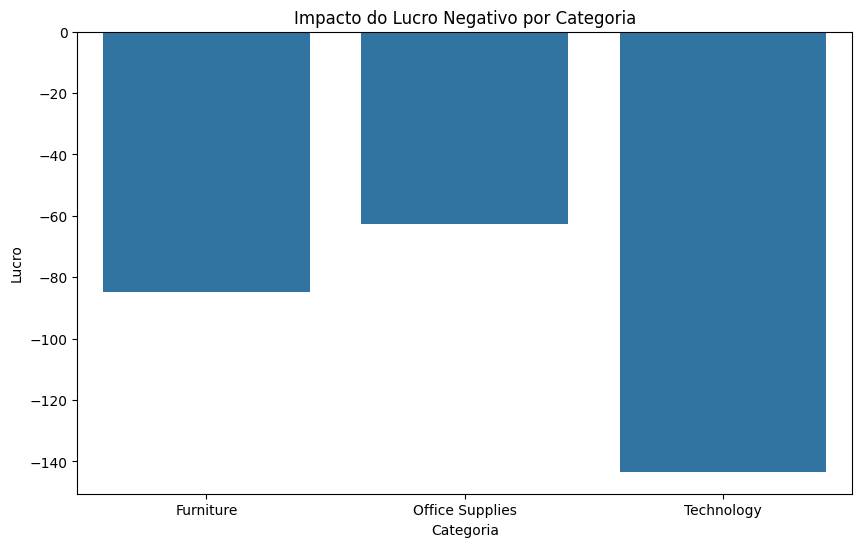

In [91]:


# Gráfico de barras mostrando o impacto do lucro negativo por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=negative_profit_df, ci=None)
plt.title('Impacto do Lucro Negativo por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Lucro')
plt.show()

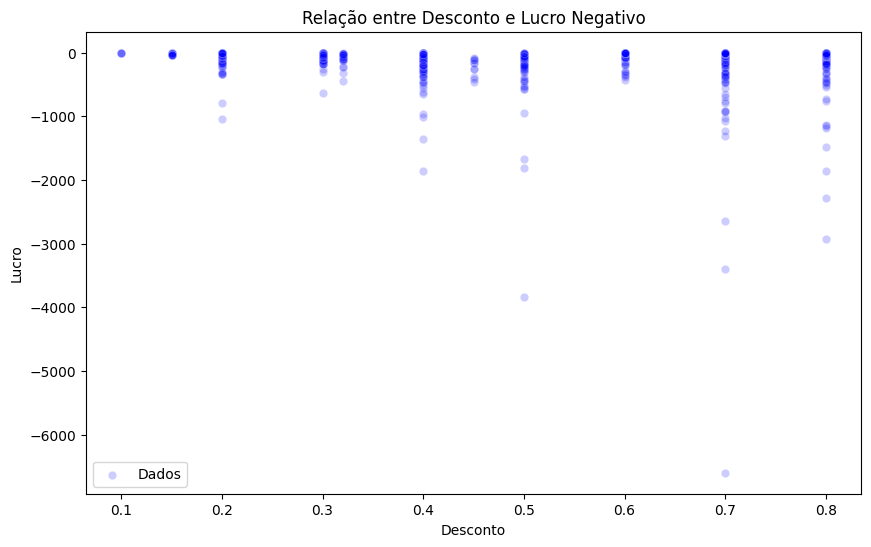

In [77]:

# Possíveis causas e investigações
#
# Por exemplo, podemos observar que grandes descontos podem estar correlacionados com lucros negativos.

# Análise de descontos

# Calcular média e desvio-padrão para Discount
mean_discount = negative_profit_df['Discount'].mean()
std_discount = negative_profit_df['Discount'].std()

# Definir limites para anomalias
lower_limit_discount = mean_discount - 3 * std_discount
upper_limit_discount = mean_discount + 3 * std_discount

# Filtrar anomalias
anomalies_discount = negative_profit_df[(negative_profit_df['Discount'] < lower_limit_discount) | (negative_profit_df['Discount'] > upper_limit_discount)]

# Plotar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=negative_profit_df, label='Dados', color='blue', alpha=0.2)

# Plotar anomalias em vermelho
if not anomalies_discount.empty:
    sns.scatterplot(x='Discount', y='Profit', data=anomalies_discount, label='Anomalias', color='red', alpha=0.3)

# Adicionar título e rótulos
plt.title('Relação entre Desconto e Lucro Negativo')
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.legend()

# Mostrar gráfico
plt.show()

'




---


```
ANALISE DE ANOMALIS DE DESCONTOS ELEVADOS

```




---



'

In [83]:
# Filtrar dados com descontos elevados
high_discount_df = filtered_df[filtered_df['Discount'] > 0.15]

# Calcular impacto no lucro
impact = high_discount_df.groupby('Discount')['Profit'].sum().reset_index()


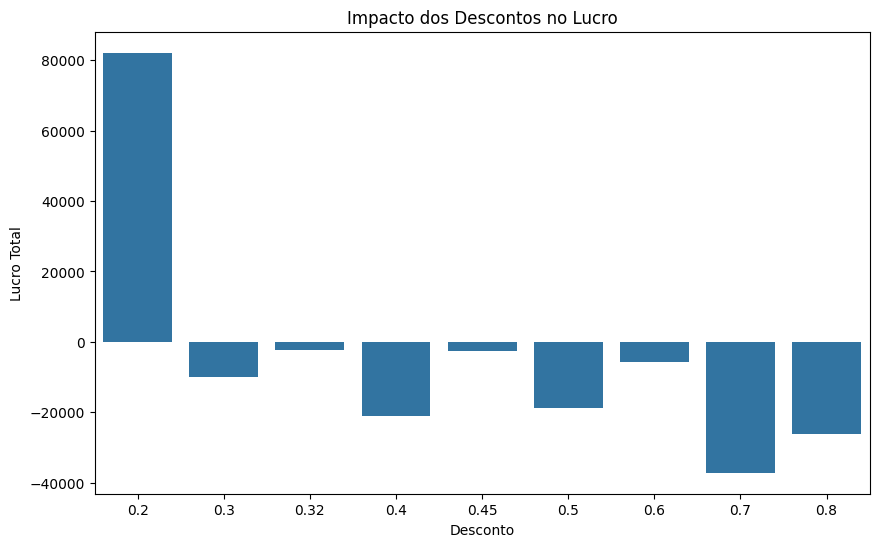

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', data=impact)
plt.title('Impacto dos Descontos no Lucro')
plt.xlabel('Desconto')
plt.ylabel('Lucro Total')
plt.show()


In [89]:
top_negative = high_discount_df.sort_values(by= 'Discount' and 'Profit', ascending=True)

print(top_negative[[ 'Product Name', 'Sales', 'Discount', 'Profit']])



                                           Product Name      Sales  Discount  \
7772          Cubify CubeX 3D Printer Double Head Print   4499.985       0.7   
683           Cubify CubeX 3D Printer Triple Head Print   7999.980       0.5   
3011          Lexmark MX611dhe Monochrome Laser Printer   2549.985       0.7   
4991               Ibico EPK-21 Electric Binding System   1889.990       0.8   
3151          Cubify CubeX 3D Printer Double Head Print   1799.994       0.7   
...                                                 ...        ...       ...   
353           GBC DocuBind P400 Electric Binding System   4355.168       0.2   
9270         GBC DocuBind TL300 Electric Binding System   4305.552       0.2   
7818               Ibico EPK-21 Electric Binding System   4535.976       0.2   
8858  Fellowes PB500 Electric Punch Plastic Comb Bin...   5083.960       0.2   
2623              Canon imageCLASS 2200 Advanced Copier  11199.968       0.2   

         Profit  
7772 -6599.9780  
683